In [23]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [15]:
data=pd.read_csv("C:/Users/arist/Downloads/archive/data_2020_2021.csv",sep=",")
data.head(12)

,journee,home,away,scores,home_goal,away_goal,ht_home_goal,ht_away_goal
0,1. Journée,Girondins Bordeaux,FC Nantes,0:0 (0:0),0,0,0,0
1,1. Journée,Dijon FCO,Angers SCO,0:1 (0:1),0,1,0,1
2,1. Journée,Lille OSC,Stade Rennes,1:1 (1:0),1,1,1,0
3,1. Journée,AS Monaco,Stade Reims,2:2 (1:2),2,2,1,2
4,1. Journée,FC Lorient,RC Strasbourg,3:1 (0:1),3,1,0,1
5,1. Journée,Nîmes Olympique,Stade Brest,4:0 (2:0),4,0,2,0
6,1. Journée,OGC Nice,RC Lens,2:1 (1:1),2,1,1,1
7,1. Journée,Montpellier HSC,Olympique Lyon,2:1 (1:0),2,1,1,0
8,1. Journée,Paris Saint-Germain,FC Metz,1:0 (0:0),1,0,0,0
9,1. Journée,Olympique Marseille,AS Saint-Étienne,0:2 (0:1),0,2,0,1


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 380 entries, 0 to 379
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   journee       380 non-null    object
 1   home          380 non-null    object
 2   away          380 non-null    object
 3   scores        380 non-null    object
 4   home_goal     380 non-null    int64 
 5   away_goal     380 non-null    int64 
 6   ht_home_goal  380 non-null    int64 
 7   ht_away_goal  380 non-null    int64 
dtypes: int64(4), object(4)
memory usage: 23.9+ KB


In [10]:
#nb de but total du psg
nb_but = 0
for i in range(len(data)): 
    if data.loc[i, "home"] == "Paris Saint-Germain":
        nb_but += data.loc[i, "home_goal"]
    if data.loc[i, "away"] == "Paris Saint-Germain":
        nb_but += data.loc[i, "away_goal"]

print(nb_but)


86


In [18]:
equipes=list(set(data["home"]))
print(equipes)

['FC Lorient', 'Montpellier HSC', 'Olympique Lyon', 'Dijon FCO', 'OGC Nice', 'Stade Rennes', 'FC Nantes', 'Paris Saint-Germain', 'FC Metz', 'Girondins Bordeaux', 'AS Saint-Étienne', 'Olympique Marseille', 'RC Strasbourg', 'Stade Reims', 'AS Monaco', 'Nîmes Olympique', 'Lille OSC', 'RC Lens', 'Angers SCO', 'Stade Brest']


In [20]:
#Nb de but de toutes les équipes
but_equipe=[]
for j in equipes:
    nb_but = 0
    for i in range(len(data)): 
        if data.loc[i, "home"] == j:
            nb_but += data.loc[i, "home_goal"]
        if data.loc[i, "away"] == j:
            nb_but += data.loc[i, "away_goal"]
    but_equipe.append(nb_but)
    print(j,nb_but)

FC Lorient 50
Montpellier HSC 60
Olympique Lyon 81
Dijon FCO 25
OGC Nice 50
Stade Rennes 52
FC Nantes 47
Paris Saint-Germain 86
FC Metz 44
Girondins Bordeaux 42
AS Saint-Étienne 42
Olympique Marseille 54
RC Strasbourg 49
Stade Reims 42
AS Monaco 76
Nîmes Olympique 40
Lille OSC 64
RC Lens 55
Angers SCO 40
Stade Brest 50


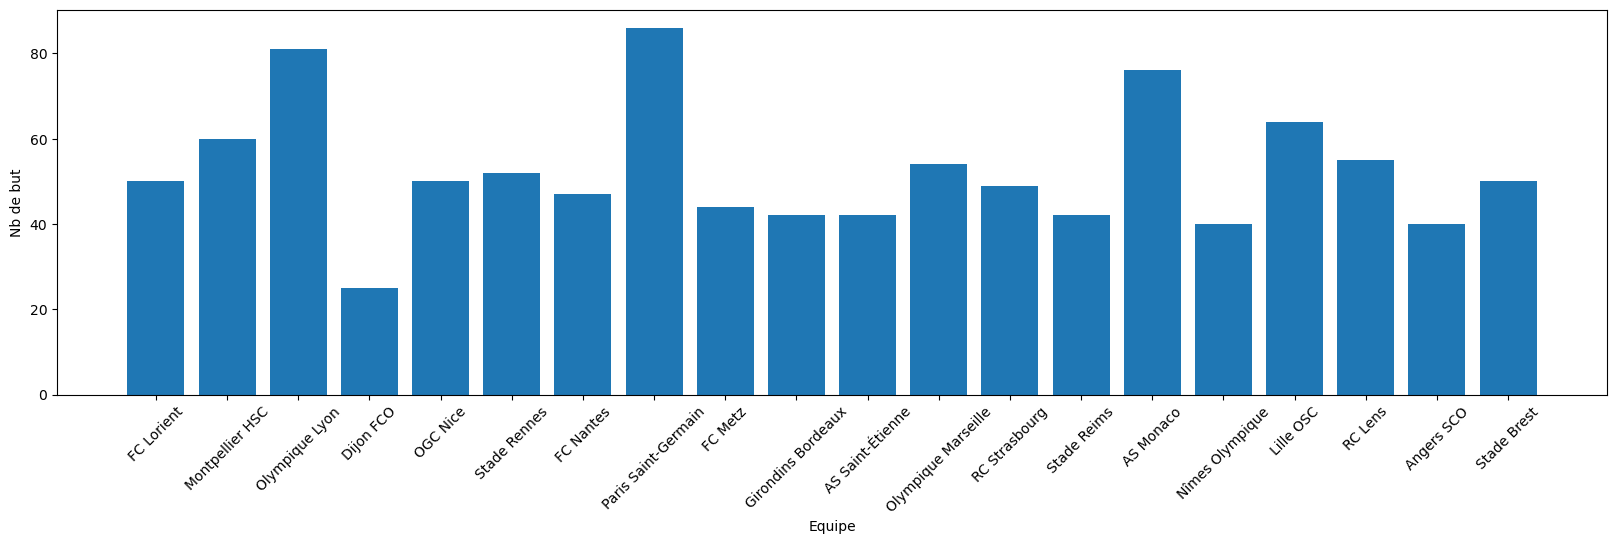

In [36]:
plt.figure(figsize=(20, 5))
plt.bar(equipes,but_equipe)
plt.xticks(rotation=45)
plt.xlabel("Equipe")
plt.ylabel("Nb de but")
plt.show()

In [60]:
# pourcentage de chance que l'equipe gagne si elle gagne à la mi temps pour le psg

data["gagnant"]=[0 for i in range(len(data))]
data["gagnant à la mi temps"]=[0 for i in range(len(data))]
for i in range(len(data)):
    if int(data["scores"][i][0])>int(data["scores"][i][2]):
        data["gagnant"][i]=data["home"][i]
    elif int(data["scores"][i][0])<int(data["scores"][i][2]):
        data["gagnant"][i]=data["away"][i]
    else:
        data["gagnant"][i]="match nul"
for i in range(len(data)):
    if int(data["scores"][i][5])>int(data["scores"][i][7]):
        data["gagnant à la mi temps"][i]=data["home"][i]
    elif int(data["scores"][i][5])<int(data["scores"][i][7]):
        data["gagnant à la mi temps"][i]=data["away"][i]
    else:
        data["gagnant à la mi temps"][i]="match nul"

C:\Users\arist\AppData\Local\Temp\ipykernel_7296\660254616.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["gagnant"][i]="match nul"
C:\Users\arist\AppData\Local\Temp\ipykernel_7296\660254616.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["gagnant à la mi temps"][i]="match nul"


In [61]:
data.head(10)

,journee,home,away,scores,home_goal,away_goal,ht_home_goal,ht_away_goal,gagnant,gagnant à la mi temps
0,1. Journée,Girondins Bordeaux,FC Nantes,0:0 (0:0),0,0,0,0,match nul,match nul
1,1. Journée,Dijon FCO,Angers SCO,0:1 (0:1),0,1,0,1,Angers SCO,Angers SCO
2,1. Journée,Lille OSC,Stade Rennes,1:1 (1:0),1,1,1,0,match nul,Lille OSC
3,1. Journée,AS Monaco,Stade Reims,2:2 (1:2),2,2,1,2,match nul,Stade Reims
4,1. Journée,FC Lorient,RC Strasbourg,3:1 (0:1),3,1,0,1,FC Lorient,RC Strasbourg
5,1. Journée,Nîmes Olympique,Stade Brest,4:0 (2:0),4,0,2,0,Nîmes Olympique,Nîmes Olympique
6,1. Journée,OGC Nice,RC Lens,2:1 (1:1),2,1,1,1,OGC Nice,match nul
7,1. Journée,Montpellier HSC,Olympique Lyon,2:1 (1:0),2,1,1,0,Montpellier HSC,Montpellier HSC
8,1. Journée,Paris Saint-Germain,FC Metz,1:0 (0:0),1,0,0,0,Paris Saint-Germain,match nul
9,1. Journée,Olympique Marseille,AS Saint-Étienne,0:2 (0:1),0,2,0,1,AS Saint-Étienne,AS Saint-Étienne


In [66]:
a=data.loc[((data["home"] == "Paris Saint-Germain") | (data["away"] == "Paris Saint-Germain"))&(data["gagnant à la mi temps"]=="Paris Saint-Germain")]

([<matplotlib.patches.Wedge at 0x1efc74857d0>,
 [Text(-0.5500000594609755, 0.9526279098330699, 'Gagné'),
  Text(0.1435789305684572, -1.0905893318278967, 'perdu'),
  Text(1.0162675251747608, -0.4209516804517678, 'match_nul')])

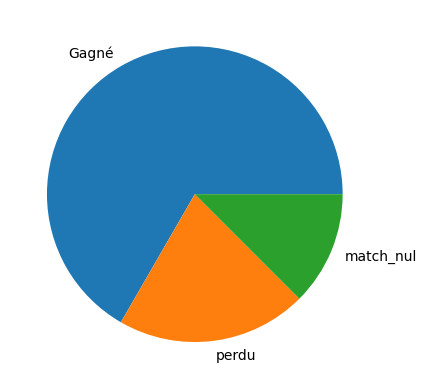

In [72]:
tot=0
match_nul=0
perdu=0
for i in range(len(a)):
    if data["gagnant à la mi temps"][i]==data["gagnant"][i]:
        tot+=1
    elif (data["gagnant"][i]!="Paris Saint-Germain")&(data["gagnant"][i]!="match nul"):
        perdu+=1
    else:
        match_nul+=1
liste_pourcentage=[tot/len(a),perdu/len(a),match_nul/len(a)]
labels = 'Gagné', 'perdu', 'match_nul'


fig, ax = plt.subplots()
ax.pie(liste_pourcentage, labels=labels)